## Simple Example
This notebook illustrates a simple example using 2 randomly generated trajectories. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from cpdetect import cpDetector
import pandas as pd

In [2]:
# Generate random trajectory
sample_1 = np.random.lognormal(0.94, 0.1, size=500)
sample_2 = np.random.lognormal(1.0, 0.1, size=500)
sample_3 = np.random.lognormal(1.20, 0.1, size=500)
sample_4 = np.random.lognormal(1.06, 0.1, size=500)

In [3]:
sampl_1 = np.concatenate((sample_3, sample_1, sample_3, sample_2, sample_4, sample_1, sample_3, sample_2, sample_4))
sampl_2 = np.concatenate((sample_1, sample_2, sample_3))
s = [sampl_1, sampl_2]

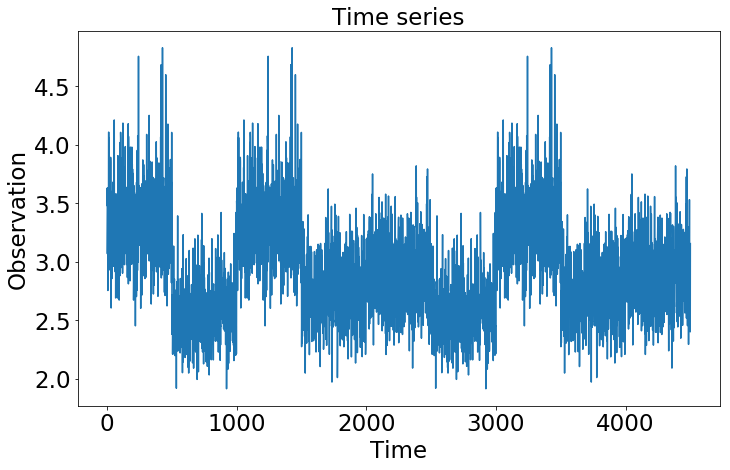

In [4]:
# Plot synthetic time series.

scale = 2.3

default_font = mpl.rcParams['font.size']
fsc = default_font*scale
fig = plt.figure(figsize=(5*scale, 3*scale))
ax = fig.add_subplot(111)

ax.plot(sampl_1)
ax.set_xlabel('Time', fontsize=fsc)
ax.set_ylabel('Observation', fontsize=fsc)
for axis in [ax.xaxis, ax.yaxis]:
    axis.set_tick_params(labelsize=fsc)
plt.title('Time series', fontsize=fsc);

In [5]:
# To find change points, instansiate a cpDetector with an underlying distribution (normal or log normal) and logg odds
# threshold
detector = cpDetector(s, distribution='log_normal', log_odds_threshold=0)

In [10]:
detector.detect_cp()

16:23:59 INFO cpDetector: =======================================
16:23:59 INFO cpDetector: Running change point detector
16:23:59 INFO cpDetector: =======================================
16:23:59 INFO cpDetector:    input observations: 2 of length [4500, 1500]
16:23:59 INFO cpDetector: Running cp detector on traj 0
16:23:59 INFO cpDetector: ---------------------------------
16:23:59 INFO cpDetector:     Found a new change point at: 500!!
16:24:00 INFO cpDetector:     Found a new change point at: 993!!
16:24:00 INFO cpDetector:     Found a new change point at: 1500!!
16:24:00 INFO cpDetector:     Found a new change point at: 3000!!
16:24:00 INFO cpDetector:     Found a new change point at: 2501!!
16:24:01 INFO cpDetector:     Found a new change point at: 2000!!
16:24:01 INFO cpDetector:     Found a new change point at: 3500!!
16:24:01 INFO cpDetector:     Found a new change point at: 4000!!
16:24:01 INFO cpDetector: Generating step fucntion
16:24:01 INFO cpDetector: -------------------

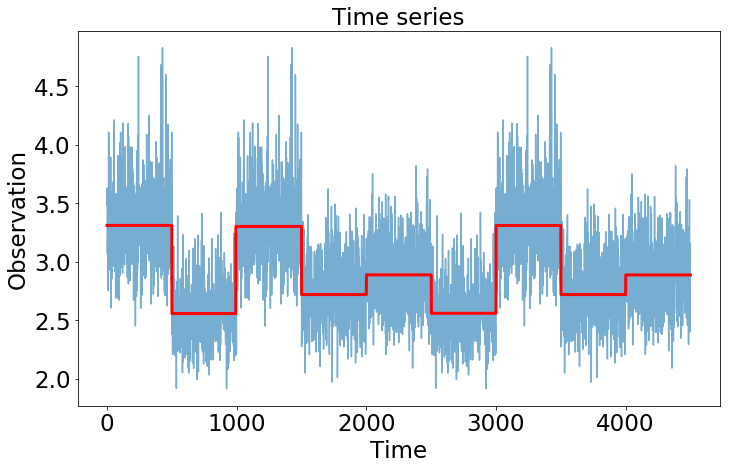

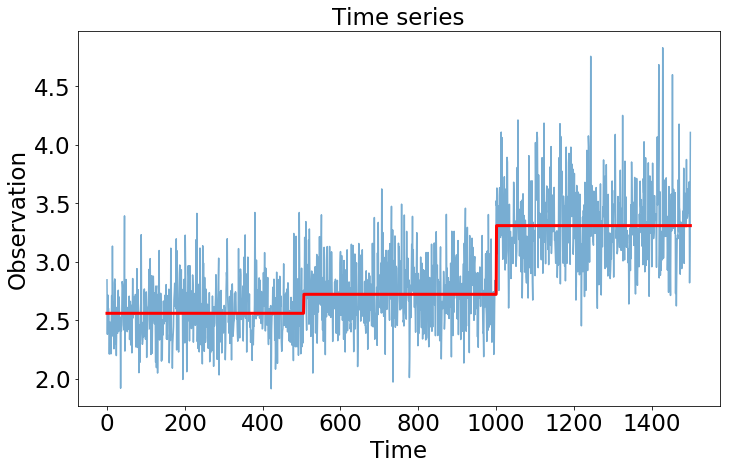

In [11]:
# Plot results

scale = 2.3

default_font = mpl.rcParams['font.size']
fsc = default_font*scale

fig = plt.figure(figsize=(5*scale, 3*scale))
ax = fig.add_subplot(111)
plt.figure(1)
plt.plot(s[0], alpha=0.6)
plt.plot(detector.step_function['traj_%s' % 0], 'r', linewidth=3)
ax.set_xlabel('Time', fontsize=fsc)
ax.set_ylabel('Observation', fontsize=fsc)
for axis in [ax.xaxis, ax.yaxis]:
    axis.set_tick_params(labelsize=fsc)
    plt.title('Time series', fontsize=fsc);
        
fig = plt.figure(figsize=(5*scale, 3*scale))
ax = fig.add_subplot(111)
plt.figure(2)
plt.plot(s[1], alpha=0.6)
plt.plot(detector.step_function['traj_%s' % 1], 'r', linewidth=3)
ax.set_xlabel('Time', fontsize=fsc)
ax.set_ylabel('Observation', fontsize=fsc)
for axis in [ax.xaxis, ax.yaxis]:
    axis.set_tick_params(labelsize=fsc)
    plt.title('Time series', fontsize=fsc);
        

In [8]:
# Save step function to csv (if trajectories are of same length, you don't have to orient by index. It will orient
# by traj)
df = pd.DataFrame.from_dict(detector.step_function, orient='index')
df.to_csv('step_function.csv')

In [9]:
# Save change_point (ts, log_odds associated wit the t, and (start_end) of segment to csv)
detector.to_csv('ts_log_odds.csv')